In [1]:
import torch
import mediapipe
import numpy as np
import pandas as pd
from ultralytics import YOLO
from transformers import pipeline
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms


In [2]:
# dataset handler

class dawtaset(Dataset):
    def __init__(self, image_path, transform=None, featureExtraction=None):
        super(dawtaset, self).__init__()
        self.image_folder = datasets.ImageFolder(image_path)
        self.transform = transform
        self.featureExtraction = featureExtraction
    def __len__(self):
        return len(self.image_folder)
    
    def __getitem__(self, idx):
        image, label = self.image_folder[idx]
        path = self.image_folder.imgs[idx][0]
        data = self.image_folder
       
        
        
        hasil = {
            'image': image,
            'labels': label,
            'id_class': idx,
            'data': data
        }
        
        return hasil

In [3]:
from torchvision.transforms import v2

transform = v2.Compose(
    [
    v2.ToImage(),
    v2.Resize([200,200]),
    # v2.RandomHorizontalFlip(p=0.5),
    v2.ToTensor(),
    ])

d:\miniconda\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [4]:
dataset = dawtaset(image_path='../../../dataset/SIBI/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/training',
                   transform=transform, featureExtraction=None)
dataset[0]

{'image': <PIL.Image.Image image mode=RGB size=2000x2000>,
 'labels': 0,
 'id_class': 0,
 'data': Dataset ImageFolder
     Number of datapoints: 468
     Root location: ../../../dataset/SIBI/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/training}

In [5]:
print(len(dataset))

468


In [6]:
# arsitektur model
from torch import nn
import timm

class arsitekturModel(nn.Module):
    def __init__(self, num_classes, hidden_size, num_lstm_layer):
        super().__init__()
        self.resnet = timm.create_model('resnet10t', pretrained=True, features_only=True)
        self.avgPool = nn.AdaptiveAvgPool2d((2,2))
        
        self.fc = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # print(x.shape)
        batch, num_frames, channels, height, width = x.shape
        
        x = torch.reshape(x, (-1, *x.shape[2:]))
        x1,x2,x3,x4,x5 = self.resnet(x)
        
        x = self.avgPool(x3)
        
        x = nn.Flatten()(x)
        x = torch.reshape(x, (batch, num_frames, -1))
        x, (h0,c0) = self.lstm(x)
        x = h0[-1, ...]
        
        x = self.fc(x)
        x = self.softmax(x)
        # x = self.sigmoid(x)
        
        return x
        

In [7]:
model = arsitekturModel(num_classes=27, hidden_size=120, num_lstm_layer=2)

In [8]:
resnet = timm.create_model('mobilenetv4_conv_small_050', pretrained=True, features_only=True)

Unexpected keys (classifier.bias, classifier.weight, conv_head.weight, norm_head.bias, norm_head.num_batches_tracked, norm_head.running_mean, norm_head.running_var, norm_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.


In [9]:
transform = transforms.Compose([
    transforms.PILToTensor()
    transfors.
])

torch.Size([1, 3, 400, 400])
torch.Size([200, 200])


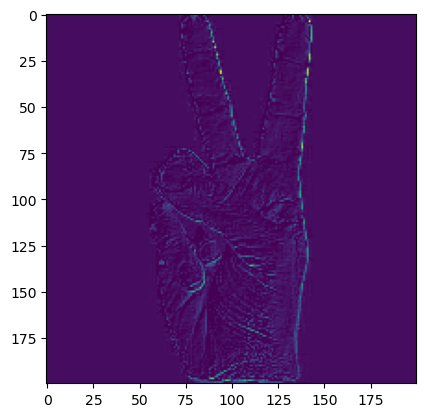

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open('../../asl_dataset/2/hand1_2_bot_seg_3_cropped.jpeg')
img_tensor = transform(im)
print(img_tensor.unsqueeze(0).shape)
ress = resnet(img_tensor.unsqueeze(0).float())

print(ress[0][0][0].shape)
plt.imshow(ress[0][0][30].detach().numpy())
plt.show()
    